 # Steps
 
 1. Import the Libraries
 2. Import the Dataset
 3. Perform the Data Analysis(DM,DE,DC,DV,EDA)
 4. Feature Scaling [Optional]
 5. Encoding
 6. Feature Selection
 7. Choosing the model - Logistic Regression
 8. Split the data - CV
 9. Training the model
 10. Test the model
 11. Performance - Confusion Metric

# Import the Libraries

In [144]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold,StratifiedKFold
from sklearn.metrics import confusion_matrix

# Import the Dataset

Link: https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv

In [158]:
df= pd.read_csv("https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv")

# Data Analysis

In [159]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [160]:
# Parch = Any Parent or Children of that person are in ship
# SibSP = Any Sibling or Spouse are in the ship

In [161]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [162]:
df.shape

(891, 12)

In [163]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [164]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<AxesSubplot:>

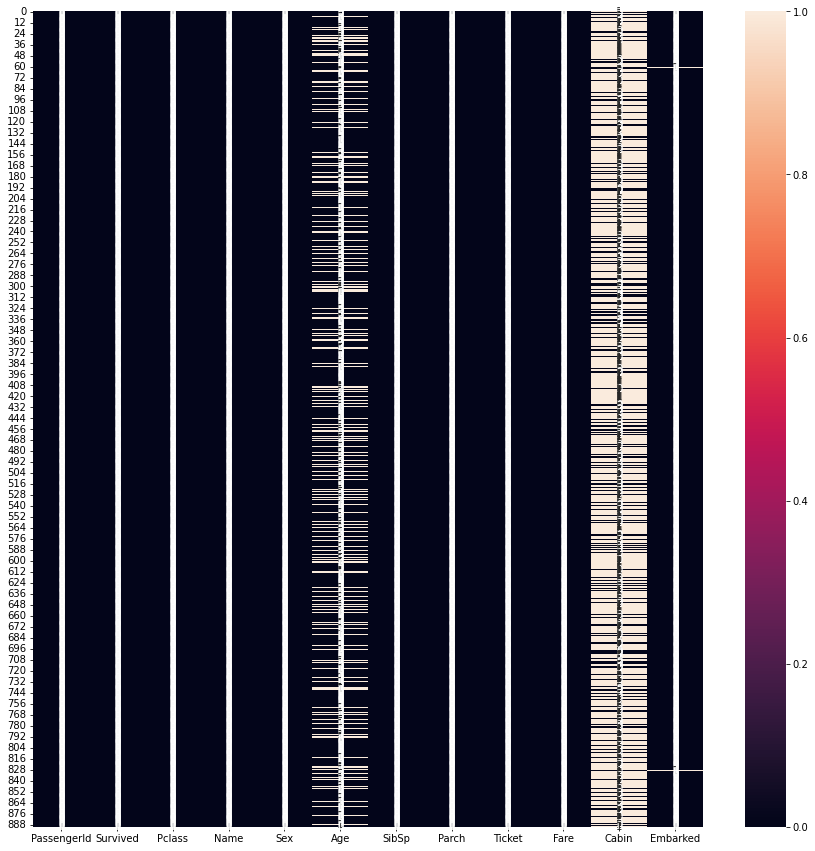

In [165]:
plt.figure(figsize=(15,15))
sns.heatmap(df.isnull(),annot=True) #<- This will make the graph of null values in the column. Here, the black line shows that there is no null lines

In [166]:
# Age % of null values
(df.Age.isnull().sum()/len(df.Age))*100  #<- This will give how many percentage of data missing in the Age column dataset

19.865319865319865

In [167]:
# Cabin % of null values
(df.Cabin.isnull().sum()/len(df.Cabin))*100

77.10437710437711

In [168]:
df.Cabin.unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [169]:
# Drop the cabin features
df.drop('Cabin',inplace=True,axis=1)

In [170]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64

In [171]:
df.Embarked.unique()
# S - Southampton
# Q - Queenstown
# C - Cherbourg

array(['S', 'C', 'Q', nan], dtype=object)

In [172]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [173]:
# Show the datapoint where the Embarked is numm
df[df.Embarked.isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,NaN


In [174]:
#Show all the Embarked values when Pclass=1
df.loc[df.Pclass==1,"Embarked"].value_counts()

S    127
C     85
Q      2
Name: Embarked, dtype: int64

In [175]:
#Show all the Embarked values when Pclass=2
df.loc[df.Pclass==2,"Embarked"].value_counts()

S    164
C     17
Q      3
Name: Embarked, dtype: int64

In [176]:
#Show all the Embarked values when Pclass=3
df.loc[df.Pclass==3,"Embarked"].value_counts()

S    353
Q     72
C     66
Name: Embarked, dtype: int64

In [177]:
df[df.Embarked.isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,NaN


In [178]:
# Show all the Embarked value where the Ticket = 113572
df.loc[df.Ticket==113572,"Embarked"].value_counts()

Series([], Name: Embarked, dtype: int64)

In [179]:
# For delete this rows, you can use dropna function. But this Dropna function wil delete all the rows of contains null values and here there are 177 rows of age which contains null values.
# So, first of all, we will fix that null values and after that we will delete that rows which contains null values

In [180]:
df.Age

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [181]:
# Means of Age column
df.Age.mean()

29.69911764705882

In [182]:
# Median of Age column
df.Age.median()   #<-The middle of 

28.0

In [183]:
# Mode of Age column
df.Age.mode()   #<- mode meaning the value which comes so many times in column

0    24.0
dtype: float64

In [184]:
df.Age.value_counts()

24.00    30
22.00    27
18.00    26
28.00    25
19.00    25
         ..
55.50     1
74.00     1
0.92      1
70.50     1
12.00     1
Name: Age, Length: 88, dtype: int64

### Here, mean and median both should be applicable. But which will be the best for find that we will use this boxplot. and mode is not applicable bcoz it gives only that age which is repeated more time. It doesnt give a proper value

<AxesSubplot:>

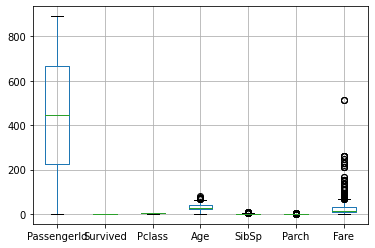

In [186]:
# PLot a box plot to find out the ouliers in the Age columns

df.boxplot()  #<- here, the box plot for Age is so small, so it will be hard to finad the outliers that's why we will use the following command

c:\users\hello\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


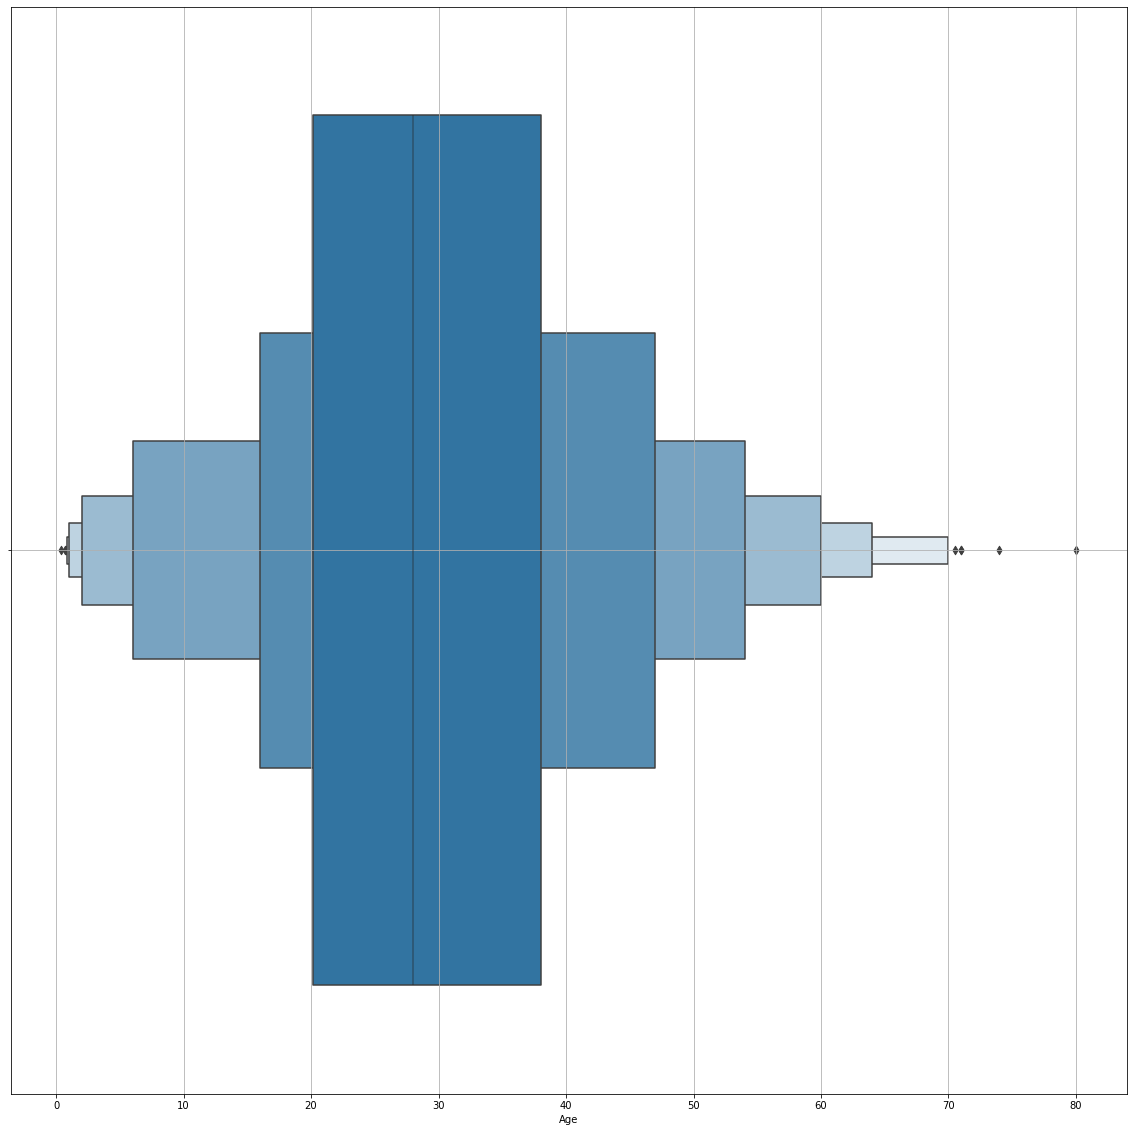

In [187]:
plt.figure(figsize=(20,20))
sns.boxenplot(df.Age)
plt.grid()

### From there above graph, we are able to known that most of majority people are between age of 10 to 70 . There are 4 people who's age is between 70 to 90 . So, there are only few people between those age, but their value will effect on the mean value and it will also effcet on prediction of data. that's why here we use median rathe than mean. 

In [188]:
# Fill all the null values in the Age column with its median value
df.Age.fillna(value=df.Age.median(), inplace=True)  #<- This fillna will fill all the null values of Age column with median

In [189]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [190]:
df.shape

(891, 11)

In [191]:
# Delete that rows which have null values in Embarked
df.dropna(inplace=True) #<- this will delete all that rows which have null values

In [192]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [193]:
df.shape

(889, 11)

In [194]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [195]:
# Drop off the columns - PassengerId, Name, Ticket
df.drop(["PassengerId","Name","Ticket"],inplace=True,axis=1)

In [196]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


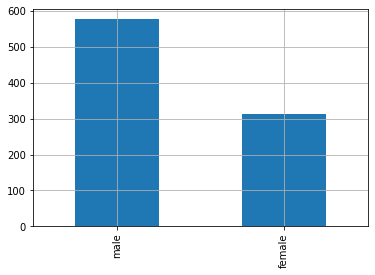

In [197]:
#Plot a graph :  Strength of Male V/s Strength of Female
df.Sex.value_counts().plot.bar()
plt.grid()

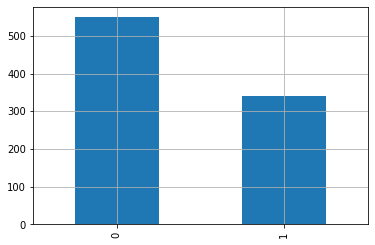

In [198]:
#Plot a graph :  Strength of Survival V/s Strength of Non Survival
df.Survived.value_counts().plot.bar()
plt.grid()

# 0 -> Not survived
# 1 -> Survived

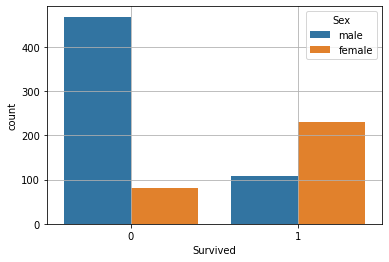

In [199]:
# Plot a graph to find out survival & non-survival rate w.r.t. Sex
sns.countplot(x="Survived",data=df, hue="Sex")
plt.grid()

<AxesSubplot:xlabel='Survived,Sex'>

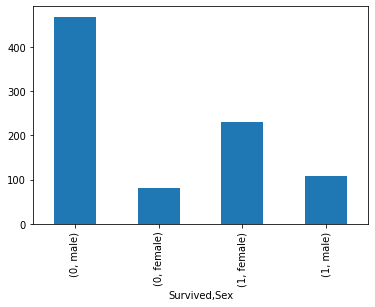

In [200]:
# Also you can do like following way but it will be some complex 
df.Sex.groupby(df.Survived).value_counts().plot.bar()

In [201]:
df.Sex.groupby(df.Survived).value_counts()

Survived  Sex   
0         male      468
          female     81
1         female    231
          male      109
Name: Sex, dtype: int64

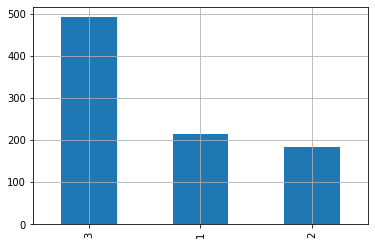

In [202]:
# Plot a graph to find out the strength of the Pclass
df.Pclass.value_counts().plot.bar()
# df.Pclass.value_counts().plot.bar(df.Pclass)   #<- you can write like this also it will give same output
plt.grid()

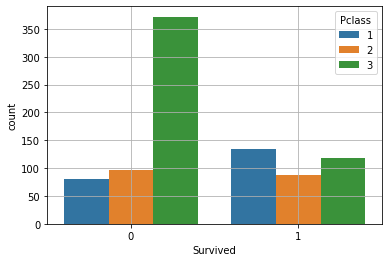

In [203]:
# plot a graph to find out the survival & non-survival w.r.t Pclass
sns.countplot(x="Survived",data=df,hue="Pclass")
plt.grid()

### More EDA can be done - More plots, more graphs, more charts, more rate, percentages, etc.

In [204]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


# Encoders - To convert the data from the categorical form to numerical form without changing its meaning

In [205]:
from sklearn.preprocessing import LabelEncoder  #<- You can use OneHotEncoder also

In [206]:
en = LabelEncoder()

In [207]:
df.Sex= en.fit_transform(df.Sex)

In [208]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,S
1,1,1,0,38.0,1,0,71.2833,C
2,1,3,0,26.0,0,0,7.9250,S
3,1,1,0,35.0,1,0,53.1000,S
4,0,3,1,35.0,0,0,8.0500,S


In [209]:
df.Age= df.Age.astype(int)

In [210]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22,1,0,7.2500,S
1,1,1,0,38,1,0,71.2833,C
2,1,3,0,26,0,0,7.9250,S
3,1,1,0,35,1,0,53.1000,S
4,0,3,1,35,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,1,27,0,0,13.0000,S
887,1,1,0,19,0,0,30.0000,S
888,0,3,0,28,1,2,23.4500,S
889,1,1,1,26,0,0,30.0000,C


In [216]:
df.Fare=df.Fare.round(2)   #<- this will round off the Fare values till 2 points

In [217]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22,1,0,7.25,S
1,1,1,0,38,1,0,71.28,C
2,1,3,0,26,0,0,7.92,S
3,1,1,0,35,1,0,53.10,S
4,0,3,1,35,0,0,8.05,S
...,...,...,...,...,...,...,...,...
886,0,2,1,27,0,0,13.00,S
887,1,1,0,19,0,0,30.00,S
888,0,3,0,28,1,2,23.45,S
889,1,1,1,26,0,0,30.00,C


In [ ]:
# One Hot Encoding for the column Embarked

In [236]:
newdf=df.copy()

In [237]:
newdf = pd.get_dummies(newdf.Embarked)

In [238]:
newdf

,C,Q,S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
886,0,0,1
887,0,0,1
888,0,0,1
889,1,0,0


In [241]:
df = pd.concat([df,newdf],axis=1)

In [242]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,C,Q,S
0,0,3,1,22,1,0,7.25,S,0,0,1
1,1,1,0,38,1,0,71.28,C,1,0,0
2,1,3,0,26,0,0,7.92,S,0,0,1
3,1,1,0,35,1,0,53.10,S,0,0,1
4,0,3,1,35,0,0,8.05,S,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,1,27,0,0,13.00,S,0,0,1
887,1,1,0,19,0,0,30.00,S,0,0,1
888,0,3,0,28,1,2,23.45,S,0,0,1
889,1,1,1,26,0,0,30.00,C,1,0,0


In [243]:
df.drop(["Embarked","C"],axis=1,inplace=True)

In [244]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Q,S
0,0,3,1,22,1,0,7.25,0,1
1,1,1,0,38,1,0,71.28,0,0
2,1,3,0,26,0,0,7.92,0,1
3,1,1,0,35,1,0,53.10,0,1
4,0,3,1,35,0,0,8.05,0,1


In [245]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  889 non-null    int64  
 1   Pclass    889 non-null    int64  
 2   Sex       889 non-null    int32  
 3   Age       889 non-null    int32  
 4   SibSp     889 non-null    int64  
 5   Parch     889 non-null    int64  
 6   Fare      889 non-null    float64
 7   Q         889 non-null    uint8  
 8   S         889 non-null    uint8  
dtypes: float64(1), int32(2), int64(4), uint8(2)
memory usage: 82.6 KB


<AxesSubplot:>

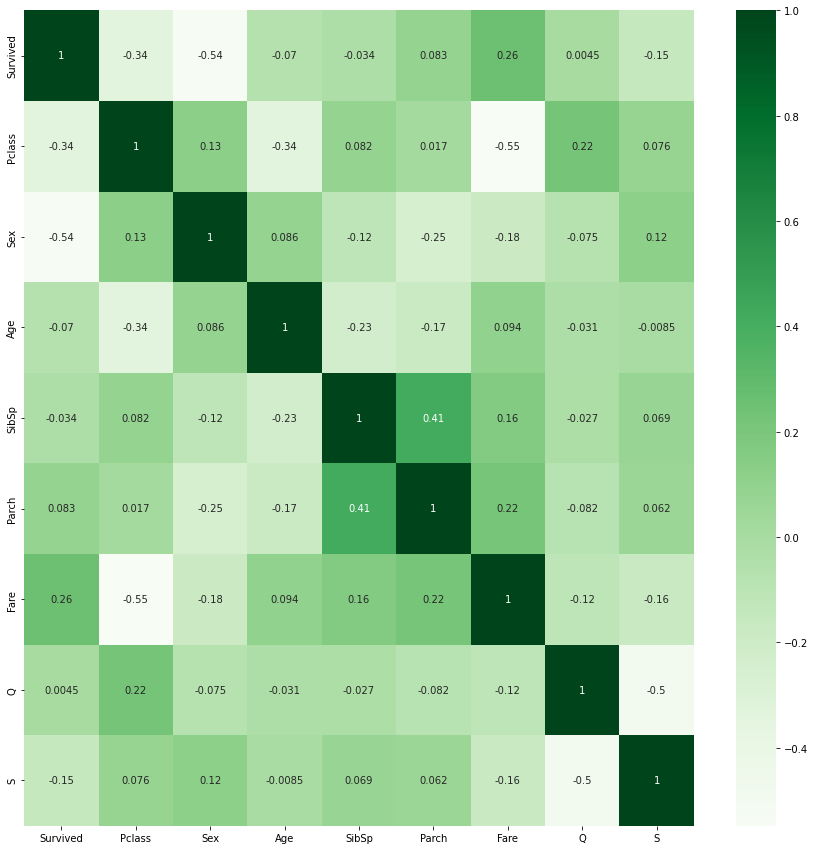

In [246]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(),annot=True,cmap="Greens")

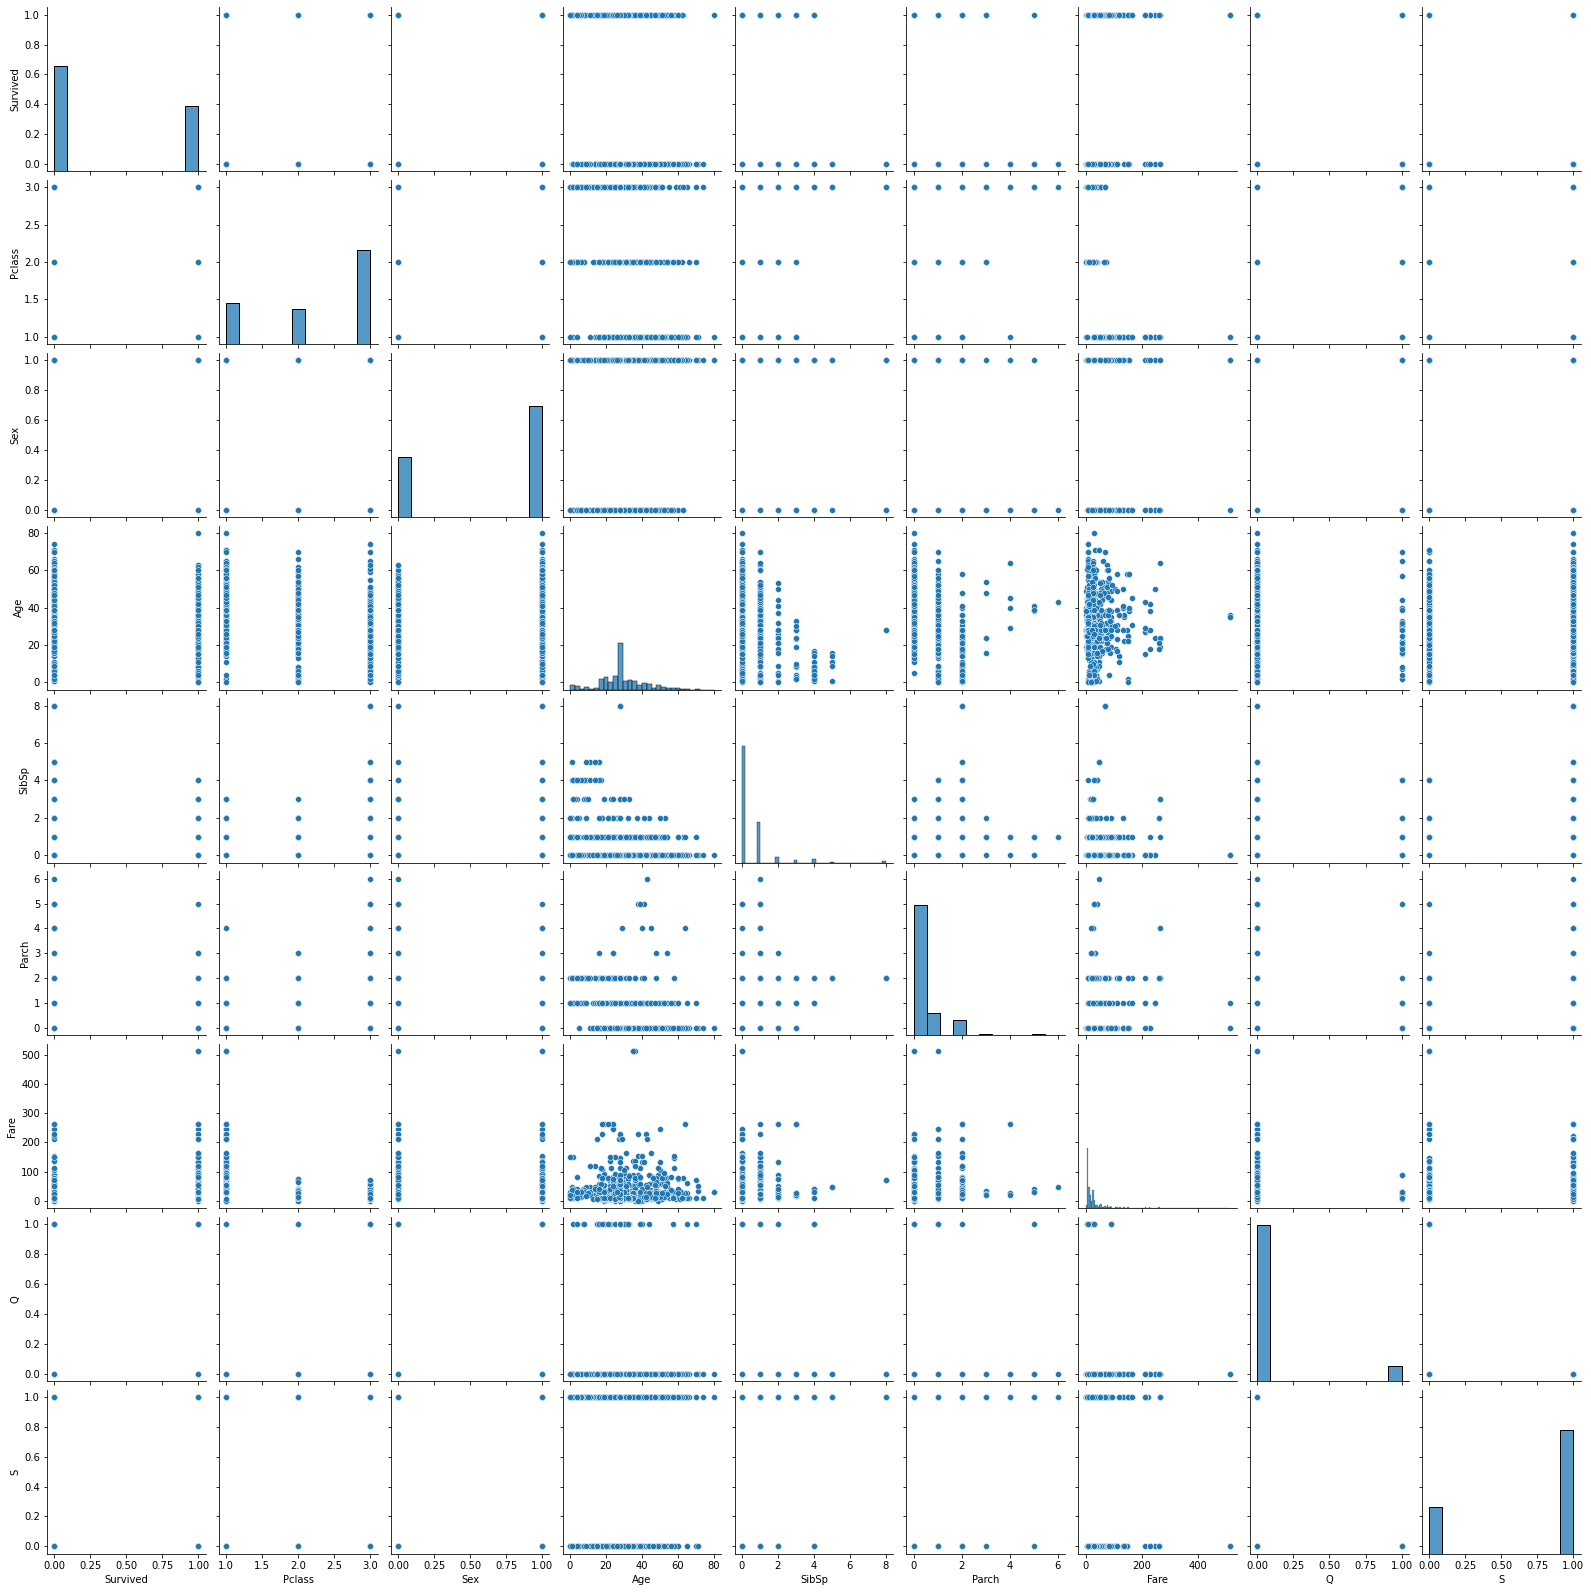

In [247]:
sns.pairplot(df)

# Feature Importance  / Feature Selection
It will tell you among all this features(columns) which feature have the greater impact on prediction

In [248]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Q,S
0,0,3,1,22,1,0,7.25,0,1
1,1,1,0,38,1,0,71.28,0,0
2,1,3,0,26,0,0,7.92,0,1
3,1,1,0,35,1,0,53.10,0,1
4,0,3,1,35,0,0,8.05,0,1


In [251]:
x= df.iloc[:,1:]
y= df.iloc[:,0]

In [253]:
from sklearn.ensemble import ExtraTreesClassifier

In [254]:
feat = ExtraTreesClassifier()

In [255]:
feat.fit(x,y)

ExtraTreesClassifier()

In [256]:
feat.feature_importances_

array([0.10777935, 0.28864488, 0.2436653 , 0.04615382, 0.04413401,
       0.23897807, 0.00927352, 0.02137103])

<AxesSubplot:>

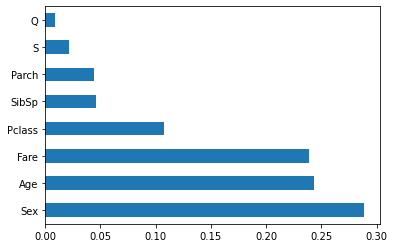

In [258]:
feat_imp = pd.Series(feat.feature_importances_,index=x.columns)
feat_imp.nlargest(8).plot(kind="barh")

# Spliting the data using CV(Cross Validation)

In [259]:
from sklearn.model_selection import StratifiedKFold

In [260]:
skf = StratifiedKFold(n_splits=5)

In [261]:
for train_index,test_index in skf.split(x,y):
    x_train,x_test = x.iloc[train_index],x.iloc[test_index]
    y_train,y_test = y.iloc[train_index],y.iloc[test_index]

In [262]:
x_train

,Pclass,Sex,Age,SibSp,Parch,Fare,Q,S
0,3,1,22,1,0,7.25,0,1
1,1,0,38,1,0,71.28,0,0
2,3,0,26,0,0,7.92,0,1
3,1,0,35,1,0,53.10,0,1
4,3,1,35,0,0,8.05,0,1
...,...,...,...,...,...,...,...,...
714,2,1,52,0,0,13.00,0,1
715,3,1,19,0,0,7.65,0,1
718,3,1,28,0,0,15.50,1,0
719,3,1,33,0,0,7.78,0,1


In [264]:
x_test

,Pclass,Sex,Age,SibSp,Parch,Fare,Q,S
706,2,0,45,0,0,13.50,0,1
707,1,1,42,0,0,26.29,0,1
708,1,0,22,0,0,151.55,0,1
709,3,1,28,1,1,15.25,0,0
710,1,0,24,0,0,49.50,0,0
...,...,...,...,...,...,...,...,...
886,2,1,27,0,0,13.00,0,1
887,1,0,19,0,0,30.00,0,1
888,3,0,28,1,2,23.45,0,1
889,1,1,26,0,0,30.00,0,0


In [263]:
y_test

706    1
707    1
708    1
709    1
710    1
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 177, dtype: int64

# Model selection

In [265]:
from sklearn.linear_model import LogisticRegression

In [266]:
classifier = LogisticRegression()

# Training the model

In [267]:
classifier.fit(x_train,y_train)

c:\users\hello\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

# Test the model

In [268]:
y_pred = classifier.predict(x_test)

# EDA

In [269]:
final = pd.DataFrame({"Actual": y_test,"Predict":y_pred})

In [270]:
final.head()

,Actual,Predict
706,1,1
707,1,0
708,1,1
709,1,0
710,1,1


<AxesSubplot:>

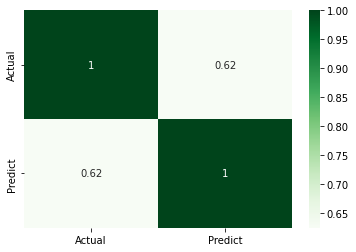

In [273]:
sns.heatmap(final.corr(),annot=True, cmap="Greens")

# Performance Metrix - Confusion Matrix

In [274]:
from sklearn.metrics import confusion_matrix

In [275]:
confusion_matrix(y_test,y_pred)

array([[98, 11],
       [20, 48]], dtype=int64)

Accuracy= (98+48)/Total = 146/177 = 0.824m

In [278]:
from sklearn.metrics import accuracy_score

In [279]:
accuracy_score(y_test,y_pred)   #<- Same as we find accuracy as above

0.8248587570621468

In [276]:
from sklearn.metrics import classification_report

In [277]:
classification_report(y_test,y_pred)

'              precision    recall  f1-score   support\n\n           0       0.83      0.90      0.86       109\n           1       0.81      0.71      0.76        68\n\n    accuracy                           0.82       177\n   macro avg       0.82      0.80      0.81       177\nweighted avg       0.82      0.82      0.82       177\n'

 # Exportation of model & dataset

Module - Pickle

Serialisation - Deserialisation
Dumping - Undumping
Pickling - Unpickling

In [282]:
import pickle

In [283]:
pick = pickle.dumps(classifier)

In [284]:
unpickle = pickle.load(pick)

TypeError: file must have 'read' and 'readline' attributes

In [285]:
%autosave 20

Autosaving every 20 seconds
